This is preliminary calculation of network simulation using solcore5.

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from Quasi3D_3J_solar_Cell_func import calc_iv


	Welcome to Solcore - version 5.5.2
	Copyright (c) 2018, Imperial College London. All rights reserved.
	Software released under the GNU Lesser General Public License.

No module named 'solcore.poisson_drift_diffusion.ddModel'


In [8]:
this_path=os.getcwd()

In [9]:
image_file=join(this_path,"masks_illumination.png")

In [10]:
img=skimage.io.imread(image_file)

In [11]:
img.shape

(120, 120)

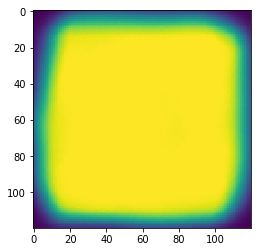

In [12]:
plt.imshow(img)

## generate new profile

In [13]:
def gen_profile(nx,ny,bound_ratio,conc=1):
    total_power_pixel=nx*ny*conc
    left_bound_x=np.floor(nx*bound_ratio).astype(np.int)
    left_bound_y=np.floor(ny*bound_ratio).astype(np.int)
    xp=np.random.randint(0,left_bound_x,size=total_power_pixel)
    yp=np.random.randint(0,left_bound_y,size=total_power_pixel)
    zmtx=np.zeros((nx,ny))
    for i in range(xp.shape[0]):
        zmtx[xp[i],yp[i]]+=1
    zmtx*=225
    return zmtx

In [14]:
def plot_profile(profile_mtx):
    fig,ax=plt.subplots(1)
    c=ax.imshow(profile_mtx)
    fig.colorbar(c, ax=ax)
    fig.tight_layout()

In [15]:
zmtx=gen_profile(60,60,0.1)

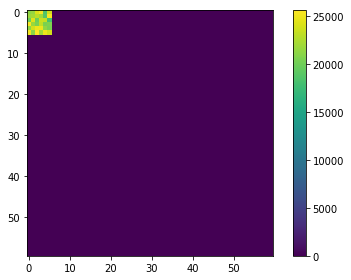

In [16]:
plot_profile(zmtx)

/Users/kanhua/miniconda3/envs/solcore5/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/kanhua/miniconda3/envs/solcore5/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Solving 1D Solar Cell...
Solving optics of the solar cell...
Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
... Done!

Solving quasi-3D Solar Cell...
... Done!!


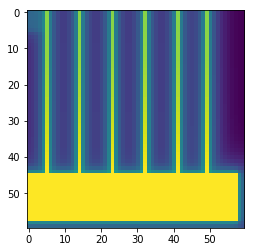

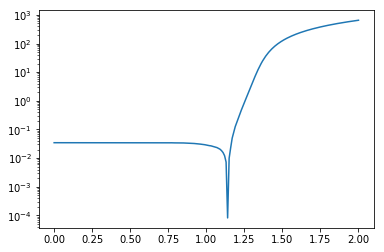

CPU times: user 3.42 s, sys: 181 ms, total: 3.6 s
Wall time: 4min 26s


In [17]:
%time v,i=calc_iv(zmtx)

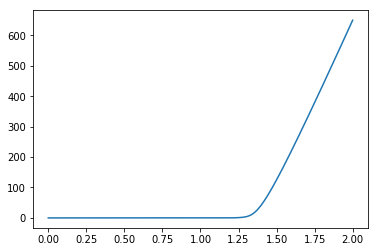

In [18]:
plt.plot(v,i)

In [13]:
nzmtx=gen_profile(60,60,0.8)

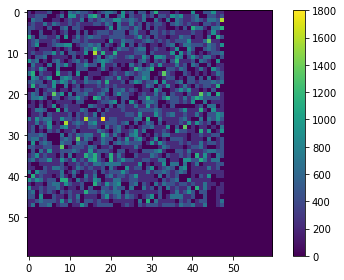

In [14]:
plot_profile(nzmtx)

/Users/kanhua/miniconda3/envs/solcore5/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/kanhua/miniconda3/envs/solcore5/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Solving 1D Solar Cell...
Solving optics of the solar cell...
Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
... Done!

Solving quasi-3D Solar Cell...
... Done!!


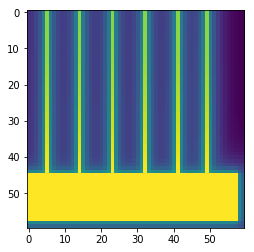

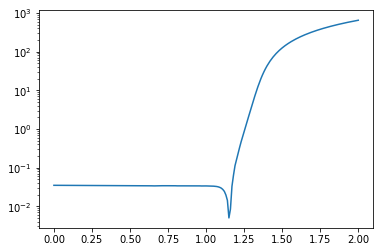

In [15]:
nv,ni=calc_iv(nzmtx)

(-0.05, 0)

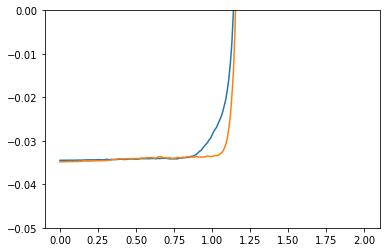

In [16]:
plt.plot(v,i)
plt.plot(nv,ni)
plt.ylim([-0.05,0])

In [17]:
nnzmtx=gen_profile(60,60,0.5)

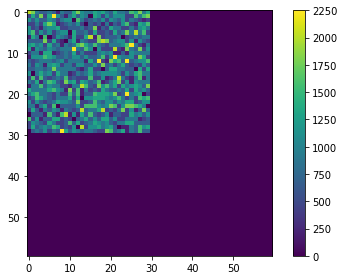

In [18]:
plot_profile(nnzmtx)

/Users/kanhua/miniconda3/envs/solcore5/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/kanhua/miniconda3/envs/solcore5/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Solving 1D Solar Cell...
Solving optics of the solar cell...
Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...
... Done!

Solving quasi-3D Solar Cell...
... Done!!


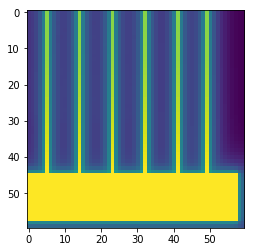

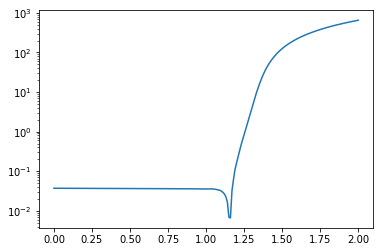

In [19]:
nnv,nni=calc_iv(nnzmtx)

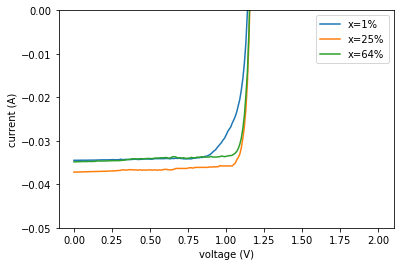

In [20]:
plt.plot(v,i,label="x=1%")
plt.plot(nnv,nni,label="x=25%")
plt.plot(nv,ni,label="x=64%")
plt.ylim([-0.05,0])
plt.legend()
plt.xlabel("voltage (V)")
plt.ylabel("current (A)")
plt.savefig("network_sim_iv.pdf")